df shape: (2580, 81) 

PID
909276070    2
909176150    1
907187080    1
527452190    1
908225370    1
Name: count, dtype: int64 

df shape: (2397, 81) 

df shape: (2397, 83) 

YrSold
2009    0.232791
2007    0.230288
2008    0.219858
2006    0.191489
2010    0.125574
Name: proportion, dtype: float64


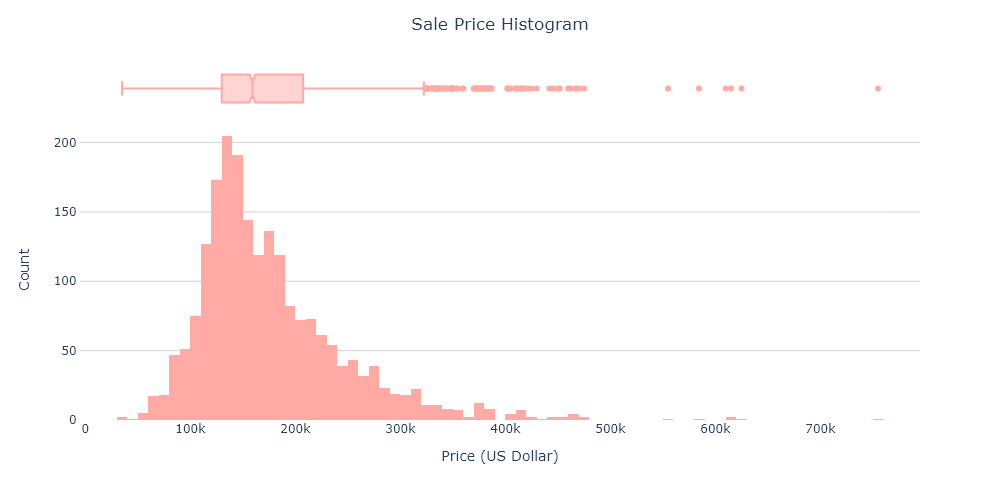

count    1693.000000
mean       68.177200
std        22.676062
min        21.000000
25%        57.000000
50%        67.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


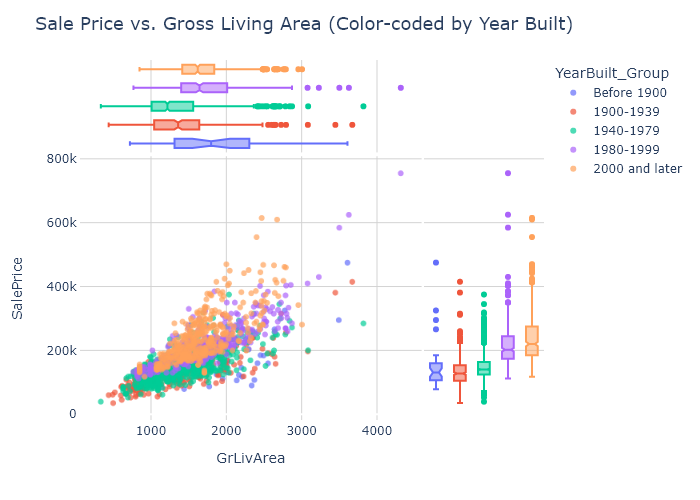

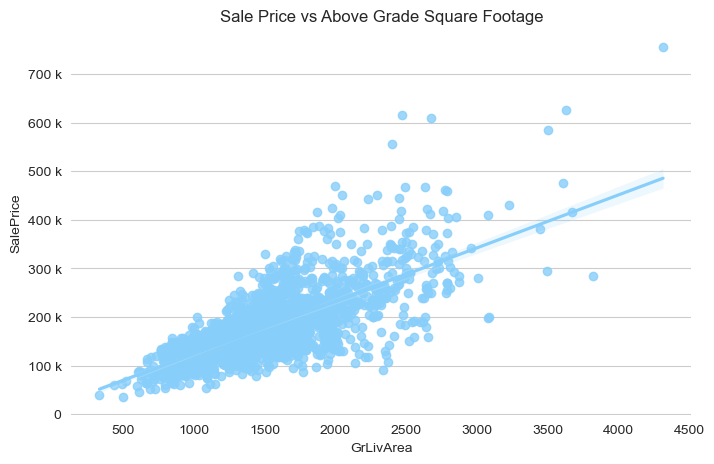

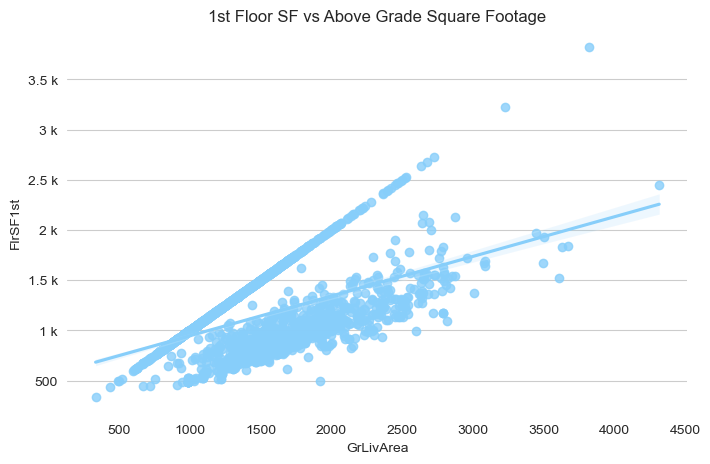

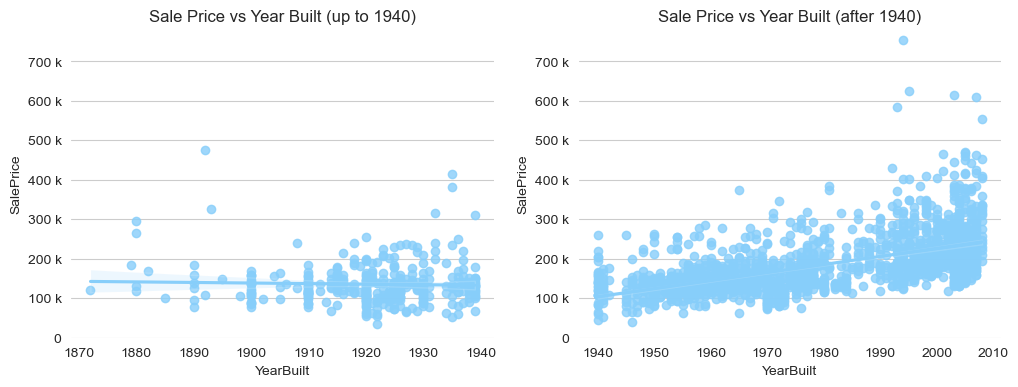

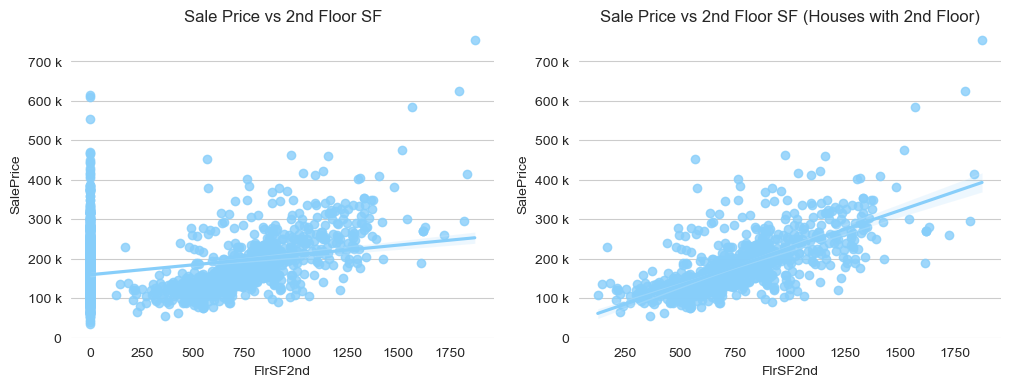

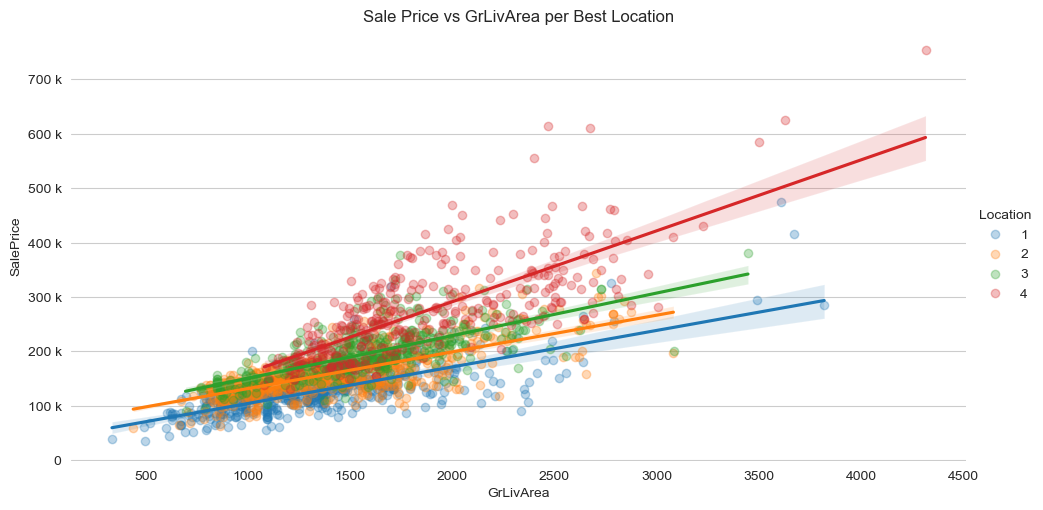

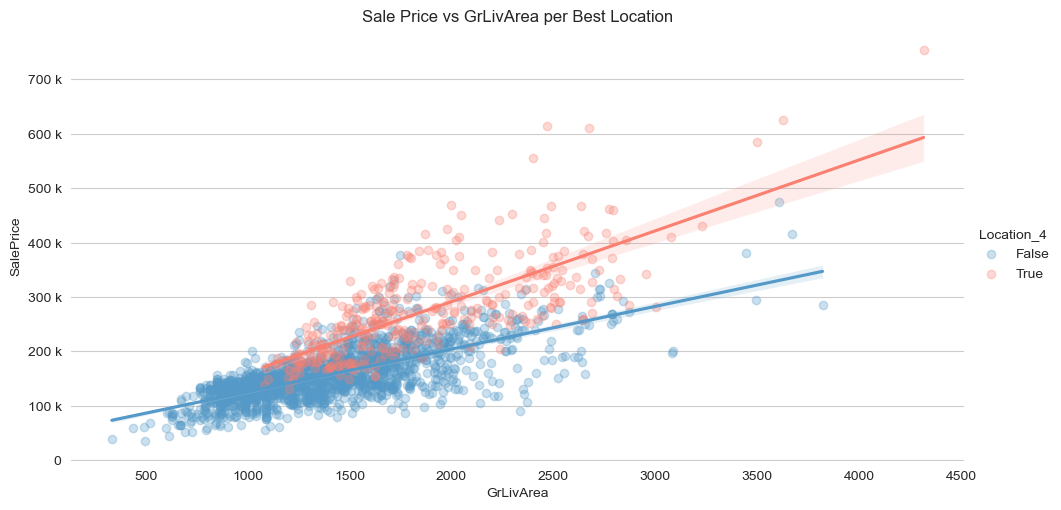

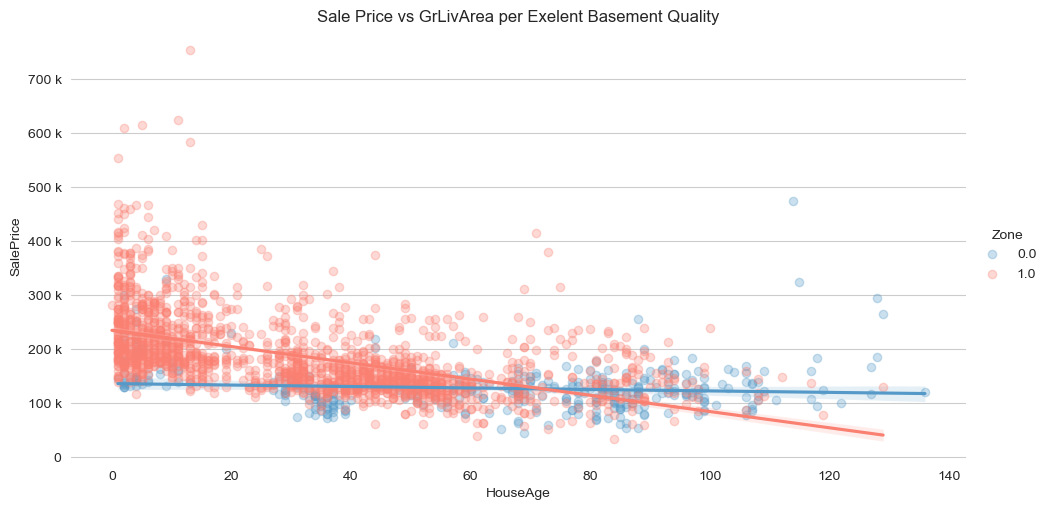

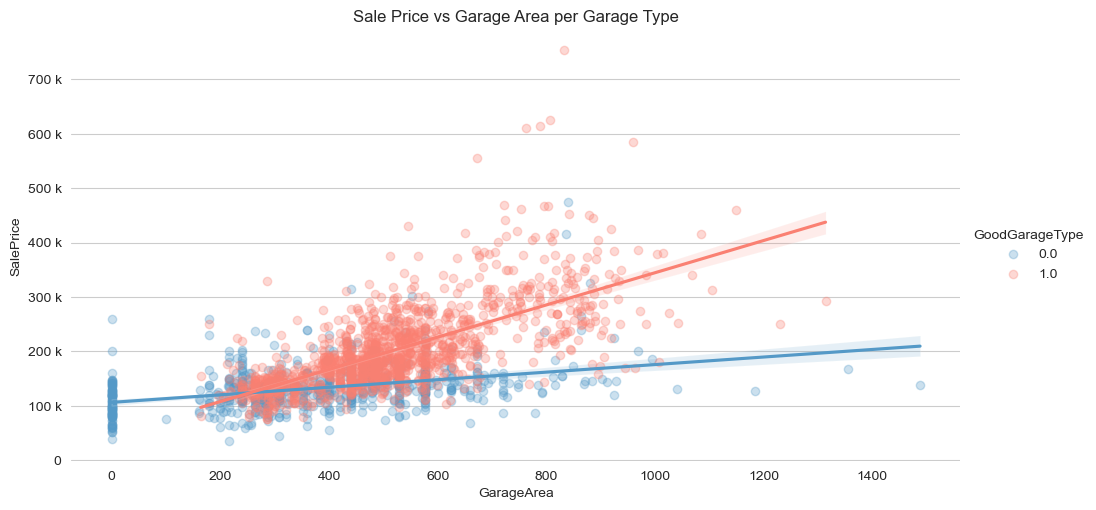

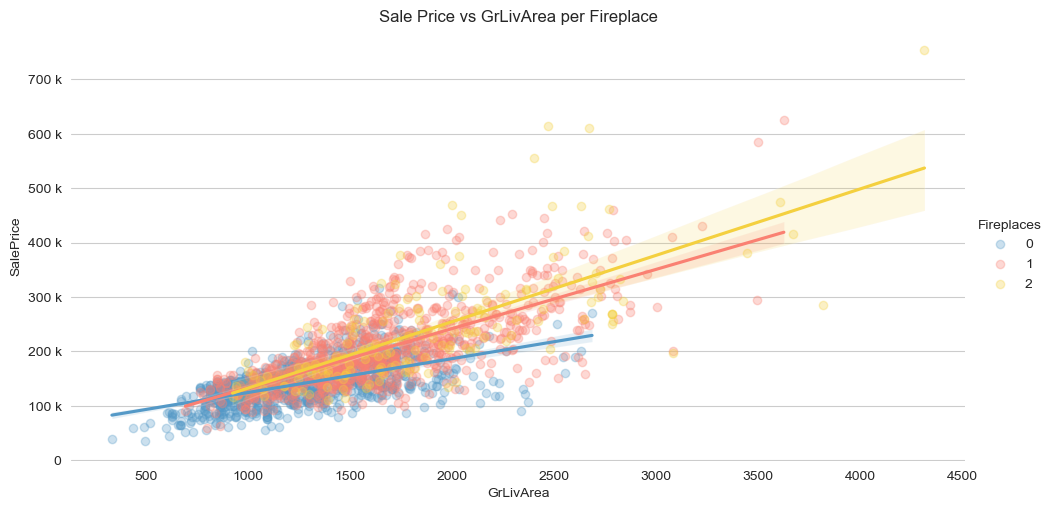

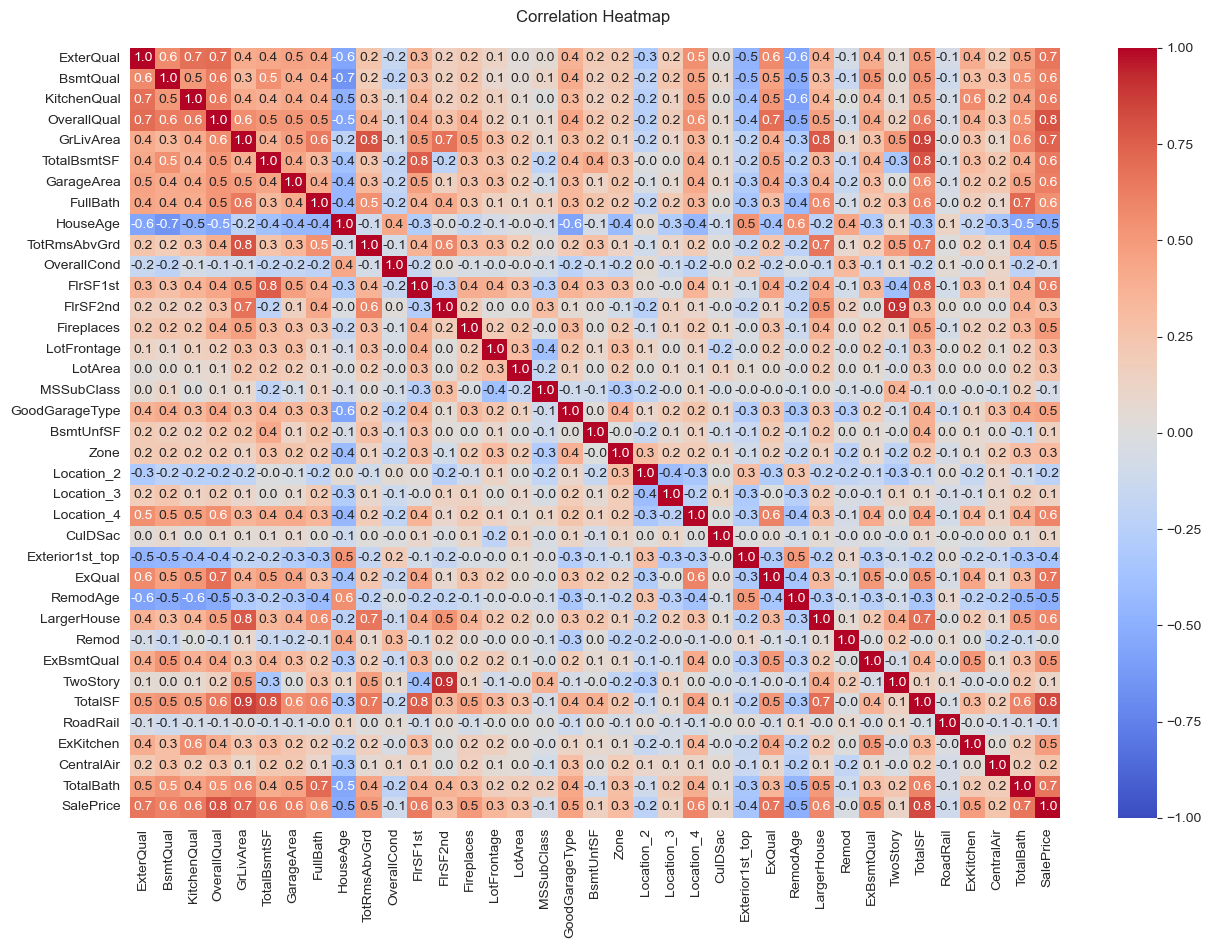

In [1]:
%run 1_Preprocessing.ipynb

In [2]:
df = pd.read_csv('data/locations_file.csv', index_col=0)#.iloc[:,1:]

print('df shape:', df.shape, '\n')
df.head()


df shape: (2096, 108) 



,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FlrSF1st,FlrSF2nd,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MapRefNo,Prop_Addr,YearBuilt_Group,HouseAge,RemodAge,TotalSF,TotalBath,RoadRail,GoodGarageType,Zone,CulDSac,Exterior1st_top,TwoStory,ExQual,LargerHouse,Remod,ExBsmtQual,HasFireplace,ExKitchen,ExterQual,BsmtQual,KitchenQual,ExterCond,Location_2,Location_3,Location_4,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,full_address,latitude,longitude
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,1,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,NaN,NaN,0,2,2009,WD,Normal,905476230.0,3416 WEST ST,1980-1999,25,25,2098.0,3.0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,0,0,0,1,0,0,0,0,0,1,"3416 WEST ST, Iowa, United STATES",42.024855,-93.663671
535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,1,SBrkr,717,322,0,0.0,0.0,1,0,2,1,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,NaN,NaN,0,5,2009,WD,Normal,535377150.0,1524 DOUGLAS AVE,Before 1900,109,6,1444.0,1.0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,0,0,0,0,0,0,0,0,0,0,"1524 DOUGLAS AVE, Iowa, United STATES",41.629402,-93.638426
534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,1,SBrkr,810,855,0,1.0,0.0,2,1,3,1,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,NaN,NaN,0,11,2009,WD,Normal,534177230.0,2304 FILLMORE AVE,2000 and later,8,8,2475.0,3.5,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,1,0,0,0,1,0,0,0,0,0,"2304 FILLMORE AVE, Iowa, United STATES",42.044554,-93.631818
908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,1,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,NaN,NaN,0,7,2009,ConLD,Normal,908128060.0,4003 MARIGOLD DR,2000 and later,6,6,1922.0,3.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,2.0,0,0,0,0,0,1,0,0,0,0,"4003 MARIGOLD DR, Iowa, United STATES",42.018988,-93.671572
902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,Bnk,AllPub,Inside,Mod,OldTown,Norm,Norm,1Story,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,0,SBrkr,936,0,0,0.0,0.0,1,0,2,1,4,Min2,0,NaN,Detchd,1974.0,Unf,2.0,576.0,TA,TA,Y,0,32,112,0,0,NaN,NaN,0,2,2009,WD,Normal,902135020.0,212 10TH ST 210,1940-1979,56,56,1872.0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0,0,0,1,0,0,1,0,0,0,"212 10TH ST 210, Iowa, United STATES",41.584122,-93.629370


#### Extract latitude and longitude information from dataset

In [3]:
#Uncomment to regenerate location file. Regeneration takes about 20 mins
# import pandas as pd
# import geopy
# import time
# from geopy import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

# # Function to generate full address
# def f_address(st):
#     full_address = str(st) + ", Iowa, United STATES"
#     return full_address

# locator = Nominatim(user_agent="myGeocoder")

# # Assuming 'df' is your DataFrame containing the data and 'Prop_Addr' is the address column
# df['full_address'] = df['Prop_Addr'].apply(f_address)

# # Create a new DataFrame to store the latitude and longitude
# locations = df['full_address'].apply(lambda addr: locator.geocode(addr, timeout=10)).dropna()

# # Extract latitude and longitude into separate columns
# df['latitude'] = locations.apply(lambda location: location.latitude)
# df['longitude'] = locations.apply(lambda location: location.longitude)

# # Display the updated DataFrame
# df.head()

In [4]:
# #save copy of df and a backup csv
# df_locations_copy = df
# df.to_csv('data/locations_file.csv', index=False)

#### Plot map of Ames, color by neighborhood and size scatter points by Price per SQFT

- This plot shows the location of the neighborhoods around Ames, Iowa. 
    - Each neighborhood is color coded.
- The size of the circles reflects the price/sqft of the houses for sale.
    - Houses in Old Town have the lowest price/sqft (92.99\\$/sqft) than the other neighborhoods. The Greens neighborhood have the highest price/sqft (164.32\\$/sqft).

In [5]:
#create Price/sqft variable
df['Price_sqft'] = df['SalePrice'] / df['GrLivArea']

# Calculate center of the map
center_lat = df['latitude'].median()
center_lon = df['longitude'].median()


In [6]:

# fig = px.scatter_mapbox(df, 
#                         lat='latitude', 
#                         lon='longitude',
#                         color='Neighborhood',  # Color points by the 'Price' column
#                         size='Price_sqft',                       
#                         title='Map of Locations Color-coded by Price',                        
#                         color_discrete_sequence=px.colors.qualitative.Alphabet,  # Choose a color scale
#                         size_max=8,  #  Set the maximum size of points on the map
#                         zoom=10.7,  #  Set the initial zoom level of the map
#                         center=dict(lat=center_lat , lon=center_lon),
#                         height=700, #  Set the height of the map figure
#                         opacity=0.5,
#                        )  

# # Update the map layout
# fig.update_layout(
#     mapbox_style="open-street-map",
#     title_x=0.5,
# )

# # Show the map
# fig.show()

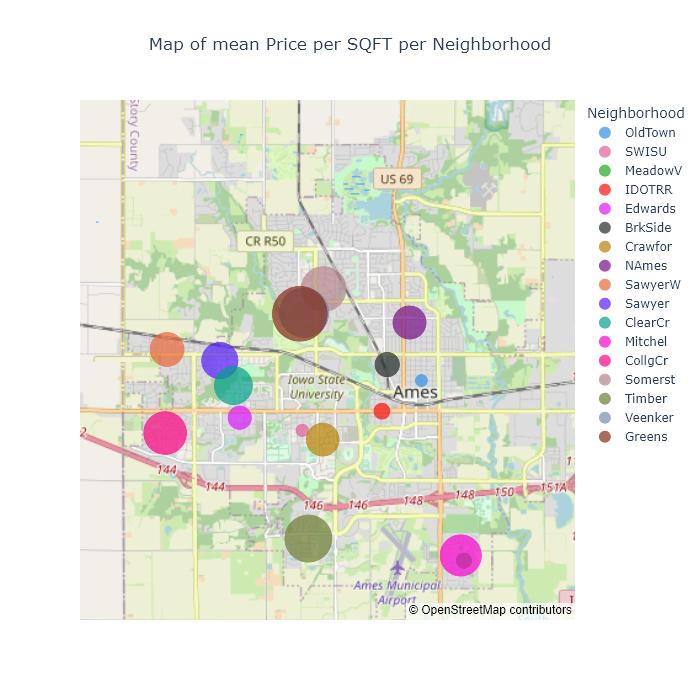

,Neighborhood,price_sqft_mean,avg_area,med_lon,med_lat,scale
0,OldTown,92.989399,1443.646067,-93.615410,42.029093,1.000000
1,SWISU,93.320805,1547.466667,-93.648601,42.018780,1.074331
2,MeadowV,95.480240,1096.259259,-93.603543,41.991776,1.558670
3,IDOTRR,95.965777,1306.980000,-93.626414,42.022753,1.667571
4,Edwards,103.581030,1313.782609,-93.666064,42.021407,3.375592
5,BrkSide,104.850353,1231.159091,-93.624954,42.032419,3.660288
6,Crawfor,116.991742,1685.827160,-93.642942,42.016855,6.383475
7,NAmes,117.435151,1273.093023,-93.618712,42.041114,6.482927
8,SawyerW,118.938544,1622.590909,-93.686346,42.035546,6.820122
9,Sawyer,122.883569,1178.280702,-93.671612,42.033245,7.704950


In [7]:

#calculate latitude and longitude of neighborhoods
df_neib = df.groupby('Neighborhood').agg( 
    price_sqft_mean = ('Price_sqft', 'mean'), 
    avg_area = ('GrLivArea', 'mean'),
    med_lon = ('longitude', 'median'), 
    med_lat = ('latitude', 'median')). \
    sort_values('price_sqft_mean').reset_index()

#filter neighborhoods that are outside the bounderies
df_neib = df_neib[(df_neib['med_lon'] < -93.5) & (df_neib['med_lon'] > -93.7)]
df_neib = df_neib[(df_neib['med_lat'] < 42.05) & (df_neib['med_lat'] > 41.95)]
df_neib = df_neib.reset_index(drop=True) 

#scale data so size is relflected by the dots
all_data_diffq = (df_neib["price_sqft_mean"].max() - df_neib["price_sqft_mean"].min()) / 16
df_neib["scale"] = (df_neib["price_sqft_mean"] - df_neib["price_sqft_mean"].min()) / all_data_diffq + 1

# Create the scatter map plot
fig = px.scatter_mapbox(df_neib, 
                        lat='med_lat', 
                        lon='med_lon',
                        color='Neighborhood',  # Color points by the 'Price' column
                        size='scale',                       
                        title='Map of mean Price per SQFT per Neighborhood',                        
                        color_discrete_sequence=px.colors.qualitative.Dark24,  # Choose a color scale
                        size_max=40,  #set the maximum size of points on the map
                        zoom=11.3,  #  Set the initial zoom level of the map
                        center=dict(lat=center_lat , lon=center_lon),
                        height=700, #  Set the height of the map figure
                        opacity=0.7,
                       )  

# Update the map layout
fig.update_layout(
    mapbox_style="open-street-map",
    title_x=0.5,
)

# Show the map
fig.show()

df_neib

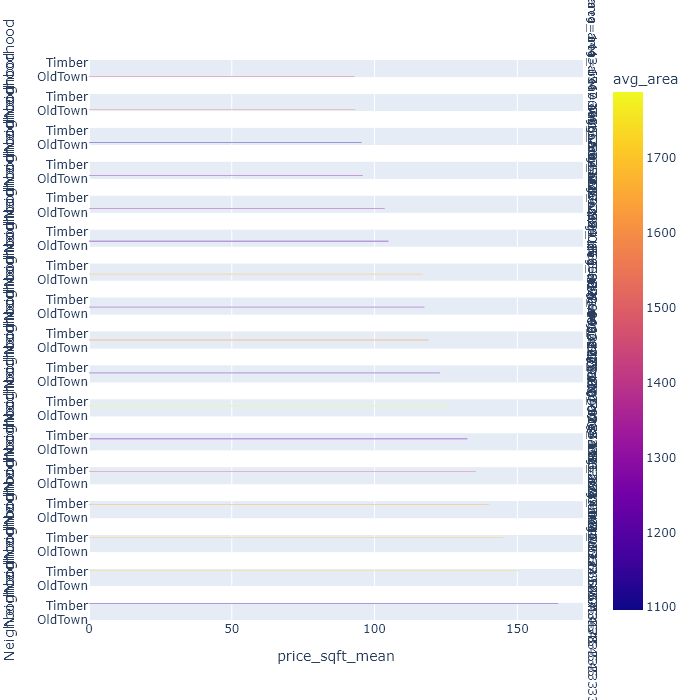

In [8]:
fig = px.bar(df_neib, x="price_sqft_mean", color="avg_area",
             y='Neighborhood',
             #title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=700,
             facet_row="avg_area",
             orientation="h"
            )

fig.show()